<a href="https://colab.research.google.com/github/olaidekashimawo/my-git-practice/blob/main/fandango.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DTSC-580: Data Manipulation
## Assignment: Fandango Movie Ratings

### Name:

## Data

Our data set comes from the data journalism site, [FiveThirtyEight](https://fivethirtyeight.com/), and was used for a 2015 article titled '[Be Suspicious Of Online Movie Ratings, Especially Fandango’s](https://fivethirtyeight.com/features/fandango-movies-ratings/)'.  The first step of this project is to read this article as it sets up the rest of this assignment and so that you will understand the data.

## Assignment

In this assignment, we will use Pandas to explore the data set from the article and to practice some basics including merging files.  Our data will be slightly different than the article as it appears they were working with a larger set of data.  When you have finished the assignment, make sure that you save your file as `fandango.ipynb` and submit it to CodeGrade for automatic grading.


## Note

<u>Show Work</u>

Remember that you must show your work.  Students submissions are spot checked manually throughout the term to verify that they are not hard coding the answer from looking only in the file or in CodeGrade's expected output.  If this is seen, the student's answer will be manually marked wrong and their grade will be changed to reflect this. If this is a recurring issue, you could fail the assignment without a chance to resubmit.

For example, if the answer to Q1, the mean of a specific column, is 22:
```
# correct way
Q1 = df['column_name'].mean()

# incorrect way
Q1 = 22
```
You must also perform all of your work in this file.  You are not allowed to merge the datasets directly in the Excel files.

First, let's import our basic libraries and set the option to display all columns in the data.

In [33]:
import pandas as pd
import numpy as np

# set display columns - Do not change or CodeGrade may not function correctly
pd.set_option('display.max_columns', None)

**Exercise:** Import the data from the four csv files: `fandango.csv`, `imdb.csv`, `metacritic.csv`, and `rt.csv`as four separate DataFrames.  Take time to review the data in the four DataFrames.

In [34]:
### ENTER CODE HERE ###
fandango_df = pd.read_csv('fandango.csv')
imdb_df = pd.read_csv('imdb.csv')
metacritic_df = pd.read_csv('metacritic.csv')
rt_df = pd.read_csv('rt.csv')

In [35]:
rt_df.sample(5)

,film,rt,rt_user,rt_norm,rt_user_norm,rt_norm_round,rt_user_norm_round
49,Night at the Museum: Secret of the Tomb (2014),50,58,2.50,2.90,2.5,3.0
107,Love & Mercy (2015),89,87,4.45,4.35,4.5,4.5
7,Unfinished Business (2015),11,27,0.55,1.35,0.5,1.5
46,Ted 2 (2015),46,58,2.30,2.90,2.5,3.0
85,Kingsman: The Secret Service (2015),75,84,3.75,4.20,4.0,4.0


In [36]:
metacritic_df.sample(5)

,film,metacritic,metacritic_user,metacritic_norm,metacritic_user_norm,metacritic_norm_round,metacritic_user_norm_round,metacritic_user_vote_count
103,Dope (2015),72,7.2,3.60,3.60,3.5,3.5,43
67,Southpaw (2015),57,8.2,2.85,4.10,3.0,4.0,128
115,The Gift (2015),77,8.3,3.85,4.15,4.0,4.0,121
125,Red Army (2015),82,7.4,4.10,3.70,4.0,3.5,11
79,The Last Five Years (2015),60,6.9,3.00,3.45,3.0,3.5,20


In [37]:
fandango_df.sample(5)

,film,fandango_stars,fandango_rating_value,fandango_votes,fandango_difference
104,Pitch Perfect 2 (2015),4.5,4.2,4577,0.3
83,Far From The Madding Crowd (2015),4.5,4.0,804,0.5
102,Annie (2014),4.5,4.2,6835,0.3
133,Spare Parts (2015),4.5,4.5,450,0.0
138,Do You Believe? (2015),5.0,4.5,1793,0.5


In [38]:
imdb_df.sample(5)

,film,imdb,imdb_norm,imdb_norm_round,imdb_user_vote_count
103,Jurassic World (2015),7.3,3.65,3.5,241807
110,Mr. Holmes (2015),7.4,3.70,3.5,7367
96,The Longest Ride (2015),7.2,3.60,3.5,25214
18,Mortdecai (2015),5.5,2.75,3.0,31878
138,Wild Tales (2014),8.2,4.10,4.0,50285


As you can see, this data contains the review scores for four review sites: Fandango, IMDB, Metacritic, and Rotten Tomatoes.  These sites use different methodologies in terms of ratings, and Rotten Tomatoes and Metacritic have separate critic scores and user scores.

According to the 538 article, the columns with 'norm' in the column name are scores that have been normalized to the five-star rating scale that Fandango uses and the columns with 'norm_round' in the column name are those columns rounded to the nearest half-star.

**Exercise:** Merge the four files together into one DataFrame called `fandango`.

In [39]:
### ENTER CODE HERE ###
fandango = pd.merge(fandango_df, imdb_df, on='film')
fandango = pd.merge(fandango, metacritic_df, on='film')
fandango = pd.merge(fandango, rt_df, on='film')


In [40]:
fandango.shape

(146, 22)

In [41]:
fandango.columns

Index(['film', 'fandango_stars', 'fandango_rating_value', 'fandango_votes',
       'fandango_difference', 'imdb', 'imdb_norm', 'imdb_norm_round',
       'imdb_user_vote_count', 'metacritic', 'metacritic_user',
       'metacritic_norm', 'metacritic_user_norm', 'metacritic_norm_round',
       'metacritic_user_norm_round', 'metacritic_user_vote_count', 'rt',
       'rt_user', 'rt_norm', 'rt_user_norm', 'rt_norm_round',
       'rt_user_norm_round'],
      dtype='object')

**Exercise:** Put the columns for `fandango` in the following order if they are not so already:
- film
- fandango_stars
- fandango_rating_value
- fandango_votes
- fandango_difference
- imdb
- imdb_norm
- imdb_norm_round
- imdb_user_vote_count
- metacritic
- metacritic_user
- metacritic_norm
- metacritic_user_norm
- metacritic_norm_round
- metacritic_user_norm_round
- metacritic_user_vote_count
- rt
- rt_user
- rt_norm
- rt_user_norm
- rt_norm_round
- rt_user_norm_round

In [42]:
### ENTER CODE HERE ###
columns_reorder = [
    'film', 'fandango_stars', 'fandango_rating_value', 'fandango_votes', 'fandango_difference',
    'imdb', 'imdb_norm', 'imdb_norm_round', 'imdb_user_vote_count',
    'metacritic', 'metacritic_user', 'metacritic_norm', 'metacritic_user_norm',
    'metacritic_norm_round', 'metacritic_user_norm_round', 'metacritic_user_vote_count',
    'rt', 'rt_user', 'rt_norm', 'rt_user_norm', 'rt_norm_round', 'rt_user_norm_round'
]

fandango = fandango[columns_reorder]

In [43]:
#Check first five row
fandango.head(5)

,film,fandango_stars,fandango_rating_value,fandango_votes,fandango_difference,imdb,imdb_norm,imdb_norm_round,imdb_user_vote_count,metacritic,metacritic_user,metacritic_norm,metacritic_user_norm,metacritic_norm_round,metacritic_user_norm_round,metacritic_user_vote_count,rt,rt_user,rt_norm,rt_user_norm,rt_norm_round,rt_user_norm_round
0,Fantastic Four (2015),3.0,2.7,6288,0.3,4.0,2.00,2.0,39838,27,2.5,1.35,1.25,1.5,1.5,421,9,20,0.45,1.00,0.5,1.0
1,Unfriended (2015),3.0,2.7,2507,0.3,5.9,2.95,3.0,22348,59,5.8,2.95,2.90,3.0,3.0,130,60,39,3.00,1.95,3.0,2.0
2,Poltergeist (2015),3.0,2.8,2704,0.2,5.0,2.50,2.5,21372,47,3.7,2.35,1.85,2.5,2.0,142,31,24,1.55,1.20,1.5,1.0
3,Blackhat (2015),3.0,2.8,1430,0.2,5.4,2.70,2.5,27328,51,5.4,2.55,2.70,2.5,2.5,80,34,25,1.70,1.25,1.5,1.5
4,The Gallows (2015),3.0,2.9,1896,0.1,4.4,2.20,2.0,5511,30,7.0,1.50,3.50,1.5,3.5,80,16,27,0.80,1.35,1.0,1.5


In [44]:
#Check last five row
fandango.tail(5)

,film,fandango_stars,fandango_rating_value,fandango_votes,fandango_difference,imdb,imdb_norm,imdb_norm_round,imdb_user_vote_count,metacritic,metacritic_user,metacritic_norm,metacritic_user_norm,metacritic_norm_round,metacritic_user_norm_round,metacritic_user_vote_count,rt,rt_user,rt_norm,rt_user_norm,rt_norm_round,rt_user_norm_round
141,"McFarland, USA (2015)",5.0,4.6,3364,0.4,7.5,3.75,4.0,13769,60,7.2,3.00,3.60,3.0,3.5,59,79,89,3.95,4.45,4.0,4.5
142,Selma (2014),5.0,4.6,7025,0.4,7.5,3.75,4.0,45344,89,7.1,4.45,3.55,4.5,3.5,316,99,86,4.95,4.30,5.0,4.5
143,American Sniper (2015),5.0,4.8,34085,0.2,7.4,3.70,3.5,251856,72,6.6,3.60,3.30,3.5,3.5,850,72,85,3.60,4.25,3.5,4.5
144,Furious 7 (2015),5.0,4.8,33538,0.2,7.4,3.70,3.5,207211,67,6.8,3.35,3.40,3.5,3.5,764,81,84,4.05,4.20,4.0,4.0
145,Straight Outta Compton (2015),5.0,4.8,8096,0.2,8.4,4.20,4.0,15982,72,7.3,3.60,3.65,3.5,3.5,90,90,94,4.50,4.70,4.5,4.5


**Exercise:** Sort the `fandango` DataFrame in alphabetical order by the `film` column.

In [45]:
### ENTER CODE HERE ###
#sort by film
fandango = fandango.sort_values(by='film')
#fandango

**Exercise:** Reset the index of the `fandango` DataFrame.  The `drop` parameter should be set to `True`.

In [46]:
### ENTER CODE HERE ###
fandango= fandango.reset_index(drop = True)
fandango

,film,fandango_stars,fandango_rating_value,fandango_votes,fandango_difference,imdb,imdb_norm,imdb_norm_round,imdb_user_vote_count,metacritic,metacritic_user,metacritic_norm,metacritic_user_norm,metacritic_norm_round,metacritic_user_norm_round,metacritic_user_vote_count,rt,rt_user,rt_norm,rt_user_norm,rt_norm_round,rt_user_norm_round
0,'71 (2015),3.5,3.5,192,0.0,7.2,3.60,3.5,24116,83,7.5,4.15,3.75,4.0,4.0,60,97,82,4.85,4.10,5.0,4.0
1,5 Flights Up (2015),4.0,3.6,79,0.4,6.1,3.05,3.0,2174,55,6.8,2.75,3.40,3.0,3.5,6,52,47,2.60,2.35,2.5,2.5
2,A Little Chaos (2015),4.0,3.9,83,0.1,6.4,3.20,3.0,4778,51,7.0,2.55,3.50,2.5,3.5,7,40,47,2.00,2.35,2.0,2.5
3,A Most Violent Year (2014),3.5,3.4,675,0.1,7.1,3.55,3.5,32166,79,7.0,3.95,3.50,4.0,3.5,133,90,69,4.50,3.45,4.5,3.5
4,About Elly (2015),4.0,3.6,43,0.4,8.2,4.10,4.0,20659,87,9.6,4.35,4.80,4.5,5.0,23,97,86,4.85,4.30,5.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,What We Do in the Shadows (2015),4.5,4.3,259,0.2,7.6,3.80,4.0,39561,75,8.3,3.75,4.15,4.0,4.0,69,96,86,4.80,4.30,5.0,4.5
142,When Marnie Was There (2015),4.5,4.1,46,0.4,7.8,3.90,4.0,4160,71,6.4,3.55,3.20,3.5,3.0,29,89,89,4.45,4.45,4.5,4.5
143,While We're Young (2015),3.0,2.9,449,0.1,6.4,3.20,3.0,17647,76,6.7,3.80,3.35,4.0,3.5,65,83,52,4.15,2.60,4.0,2.5
144,Wild Tales (2014),4.5,4.1,235,0.4,8.2,4.10,4.0,50285,77,8.8,3.85,4.40,4.0,4.5,107,96,92,4.80,4.60,5.0,4.5


**Q1:** The article begins by talking about the movie: `Fantastic Four (2015)`. Select only this row for this film from the `fandango` DataFrame.  Save it as `Q1`.

In [47]:
### ENTER CODE HERE ###
Q1 = fandango[fandango['film'] == 'Fantastic Four (2015)']
#Q1

As you can see, the `Fandango_Stars` rating is `3.0` while if we look at the other ratings from the other review sites (looking at the columns with `norm` in the column name) you will notice the review scores being much lower.

**Q2:** Select the `fandango_stars` column as a Series and save it as `Q2A`.  What is the minimum score in the Series `Q2A`?  Save this minimum value as `Q2B`.

In [48]:
### ENTER CODE HERE ###
Q2A = fandango['fandango_stars']

In [49]:
### ENTER CODE HERE ###
Q2B = Q2A.min()
#Q2B

If you were to check the minimum and maximum ranges for the other review sites, you should notice that the range of scores for the Fandango star ratings is much more narrow, and the other sites also have a much wider range of values.

Run the cell below to view boxplots of the various site's star ratings.  Notice the smaller range and higher minimum for the Fandango star ratings.

**Note:** Some students have a problem with the below code and receive an error when trying to run it.  We believe this is caused by different versions of Matplotlib.  Check the DTSC-580 FAQ for a copy of what the plot should look like.  If you receive an error, just comment out the code below.

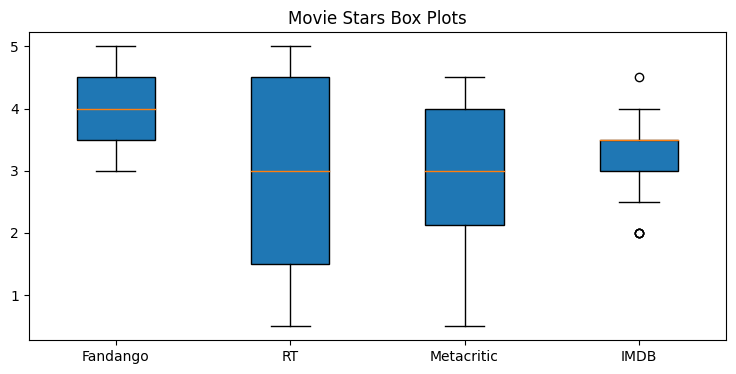

In [50]:
import matplotlib.pyplot as plt

data = fandango[['fandango_stars','rt_norm_round','metacritic_norm_round','imdb_norm_round']]
labels = ['Fandango', 'RT', 'Metacritic','IMDB']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))

# rectangular box plot
bplot1 = ax.boxplot(data,
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks

ax.set_title('Movie Stars Box Plots')

plt.show()

**Q3:** In the article, the author "normalized" the data by turning the sites with 0-100 ranges to 0-5 ranges.  
- Create a Series called `Q3` that takes the values in the `rt` column and normalizes them to 0-5 ranges.  In other words a score of:
  - 100 would equal 5
  - 75 would equal 3.75
  - 50 would equal 2.5
  - 25 would equal 1.25
  - etc
- You should be able to calculate this with one line of code.
- Round your `Q3` to 2 decimal places to prevent any decimal point precision problems depending on how you code the solution

In [51]:
### ENTER CODE HERE ###
Q3 = pd.Series(round(fandango['rt'] / 20, 2))
#Q3

**Code Check:**  To double check your calculation, your Series should match exactly the `rt_norm` column. (uncomment and run the code below)

In [52]:
# uncomment below code to double check your answer
(fandango['rt_norm'] != Q3).sum()

0

**Q4:** The article mentions the movie `Avengers: Age of Ultron (2015)`.  Select this film in the `fandango` data and save this as `Q4`.

In [53]:
### ENTER CODE HERE ###
Q4 = fandango[fandango['film'] == 'Avengers: Age of Ultron (2015)']
#Q4

**Q5:** Select only the `film`, `fandango_stars`, and `fandango_rating_value` columns from `Q4` and save it as `Q5`.

In [54]:
### ENTER CODE HERE ###
Q5 = Q4[['film', 'fandango_stars', 'fandango_rating_value']]
#Q5

As was mentioned in the article, you can see that this movie gained an entire half star between the actual rating score and the stars score.

The next four questions are just some basic practice with filtering data.

**Q6:** Select all movies with an `imdb` score of 8 or higher.  Save this DataFrame as `Q6`.

In [55]:
### ENTER CODE HERE ###
Q6 = fandango[fandango['imdb'] >= 8]
#Q6

**Q7:** Select all movies with a `rt` score of 100.  Save this DataFrame as `Q7`.

In [56]:
### ENTER CODE HERE ###
Q7 = fandango[fandango['rt'] == 100]
#Q7

**Q8:** Select all movies with a `metacritic` score less than 20. Save this DataFrame as `Q8`.

In [57]:
### ENTER CODE HERE ###
Q8 = fandango[fandango['metacritic'] <= 20]
#Q8

**Q9:** Select all movies with a `rt_user` greater than 85, `metacritic_user` score greater than 8.5, and an `imdb` score greater than 8.5.  In other words, select the movies that meet all three of these criteria.  Save this DataFrame as `Q9`.  

In [58]:
### ENTER CODE HERE ###
Q9 = fandango[(fandango['rt_user'] > 85) & (fandango['metacritic_user'] > 8.5) & (fandango['imdb'] > 8.5)]
#Q9

**Q10:** The article from 538 goes into detail about the rounding problem with the Fandango star scores.  Let's see if we can do better.  
- First create a copy of the `fandango` DataFrame and call it `Q10A`.  
- Create a new column in the `Q10A` DataFrame called `fandango_stars_revised` that rounds the `fandango_rating_value` column to the nearest half a star.  For example, 3.2 would round to 3.0, 3.3 would round to 3.5, 3.7 would round to 3.5, 3.8 would round to 4.0, etc.  
- Hint: [Check out this stackoverflow question for help](https://stackoverflow.com/questions/49164853/rounding-python-values-to-the-nearest-half-number)
- Select only the `film`, `fandango_rating_value`, and `fandango_stars_revised` columns and save this DataFrame as `Q10B`.
- Code Check:  Select all movies with a `Fandango_Ratingvalue` of 3.7 and make sure that you rounded this to 3.5.  Select all movies with a `Fandango_Ratingvalue` of 3.8 and make sure that you rounded this to 4.0.

In [59]:
### ENTER CODE HERE ###
Q10A = fandango.copy()


Q10A['fandango_stars_revised'] = Q10A['fandango_rating_value'].apply(lambda x: 4.0 if x >= 3.75 else (3.5 if x >= 3.25 else x))

#Q10A


In [60]:
### ENTER CODE HERE ###
Q10B = Q10A[['film', 'fandango_rating_value', 'fandango_stars_revised']]
Q10B[Q10B['fandango_rating_value'] == 3.7]
Q10B[Q10B['fandango_rating_value'] == 3.8]


,film,fandango_rating_value,fandango_stars_revised
12,Big Eyes (2014),3.8,4.0
18,Chappie (2015),3.8,4.0
70,Paper Towns (2015),3.8,4.0
82,Self/less (2015),3.8,4.0
139,Vacation (2015),3.8,4.0


Good work!

There is a lot more analysis that could be done with this data.  For further practice, we would encourage you to think of other questions and see if you can answer it with this data.  This would also be great practice for producing various Matplotlib and Seaborn plots to further analyze the data.